### **About Dataset**

The **Utilities** dataset includes information on 22 public utility companies in the US. 
The variable definitions are provided below. 

**Fixed_charge** = fixed-charge covering ratio (income/debt)

**RoR** = rate of return on capital

**Cost** = cost per kilowatt capacity in place

**Load_factor** = annual load factor

**Demand_growth** = peak kilowatthour demand growth from 1974 to 1975

**Sales** = sales (kilowatthour use per year)

**Nuclear** = percent nuclear

**Fuel_Cost** = total fuel costs (cents per kilowatthour)

In [139]:
import matplotlib.pylab as plt
from sklearn import preprocessing
from sklearn.decomposition import PCA
import seaborn as sns
import pandas as pd
import numpy as np
from pathlib import Path
%matplotlib inline


custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="white", palette="Set2", rc=custom_params)

In [140]:
Utilities_df = pd.read_csv('Utilities.csv')
Utilities_df.iloc[0:22]

,Company,Fixed_charge,RoR,Cost,Load_factor,Demand_growth,Sales,Nuclear,Fuel_Cost
0,Arizona,1.06,9.2,151,54.4,1.6,9077,0.0,0.628
1,Boston,0.89,10.3,202,57.9,2.2,5088,25.3,1.555
2,Central,1.43,15.4,113,53.0,3.4,9212,0.0,1.058
3,Commonwealth,1.02,11.2,168,56.0,0.3,6423,34.3,0.700
4,NY,1.49,8.8,192,51.2,1.0,3300,15.6,2.044
5,Florida,1.32,13.5,111,60.0,-2.2,11127,22.5,1.241
6,Hawaiian,1.22,12.2,175,67.6,2.2,7642,0.0,1.652
7,Idaho,1.10,9.2,245,57.0,3.3,13082,0.0,0.309
8,Kentucky,1.34,13.0,168,60.4,7.2,8406,0.0,0.862
9,Madison,1.12,12.4,197,53.0,2.7,6455,39.2,0.623


In [141]:
df = Utilities_df.drop(["Company"], axis= 1)
df.head()

,Fixed_charge,RoR,Cost,Load_factor,Demand_growth,Sales,Nuclear,Fuel_Cost
0,1.06,9.2,151,54.4,1.6,9077,0.0,0.628
1,0.89,10.3,202,57.9,2.2,5088,25.3,1.555
2,1.43,15.4,113,53.0,3.4,9212,0.0,1.058
3,1.02,11.2,168,56.0,0.3,6423,34.3,0.700
4,1.49,8.8,192,51.2,1.0,3300,15.6,2.044


**Qno. 1**
### Compute the minimum, maximum, mean, median, and standard deviation for each of the numeric variables. Which variable(s) has the largest variability? Explain your answer

Ans:- From the below summary we can note that 'Sales' features has the largest numeric variables because standard deviation is dependent on Mean value from below code we can see that 'Sales' has the highest among other features. This means feature which has maximun mean will have maximum vairance.

In [142]:
pd.DataFrame({'mean': df.mean(),
              'sd': df.std(),
              'min': df.min(),
              'max': df.max(),
              'median': df.median(),
              'miss.val': df.isnull().sum(),
             })

,mean,sd,min,max,median,miss.val
Fixed_charge,1.114091,0.184511,0.750,1.490,1.11,0
RoR,10.736364,2.244049,6.400,15.400,11.05,0
Cost,168.181818,41.191349,96.000,252.000,170.50,0
Load_factor,56.977273,4.461148,49.800,67.600,56.35,0
Demand_growth,3.240909,3.118250,-2.200,9.200,3.00,0
Sales,8914.045455,3549.984031,3300.000,17441.000,8024.00,0
Nuclear,12.000000,16.791920,0.000,50.200,0.00,0
Fuel_Cost,1.102727,0.556098,0.309,2.116,0.96,0


In [143]:
df.corr().round(2)

,Fixed_charge,RoR,Cost,Load_factor,Demand_growth,Sales,Nuclear,Fuel_Cost
Fixed_charge,1.00,0.64,-0.10,-0.08,-0.26,-0.15,0.04,-0.01
RoR,0.64,1.00,-0.35,-0.09,-0.26,-0.01,0.21,-0.33
Cost,-0.10,-0.35,1.00,0.10,0.44,0.03,0.11,0.01
Load_factor,-0.08,-0.09,0.10,1.00,0.03,-0.29,-0.16,0.49
Demand_growth,-0.26,-0.26,0.44,0.03,1.00,0.18,-0.02,-0.01
Sales,-0.15,-0.01,0.03,-0.29,0.18,1.00,-0.37,-0.56
Nuclear,0.04,0.21,0.11,-0.16,-0.02,-0.37,1.00,-0.19
Fuel_Cost,-0.01,-0.33,0.01,0.49,-0.01,-0.56,-0.19,1.00


**Qno. 2**
### Create boxplots for each of the numeric variables. Are there any extreme values for any of the variables? Which ones? Explain your answer.

Ans- Out of all the features 'Fixed_charge' and 'Sales' are the ones that consist of extreme values, we can infer this from the below Boxplots of 'Fixed_Charge' and 'Sales'. Boxplots contain blue dots which is notes that it has outliers. These outliers are the extreme values of the respective plots.

Boxplot for  Fixed_charge


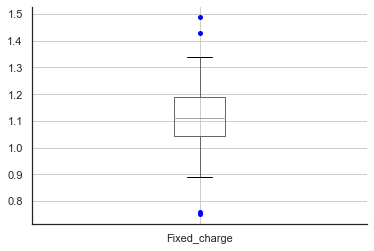


Boxplot for  RoR


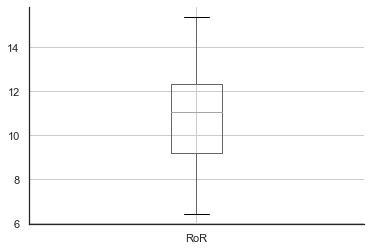


Boxplot for  Cost


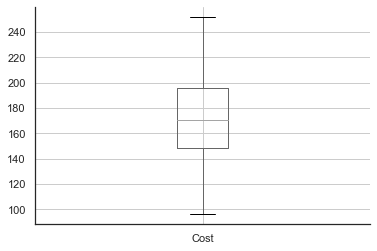


Boxplot for  Load_factor


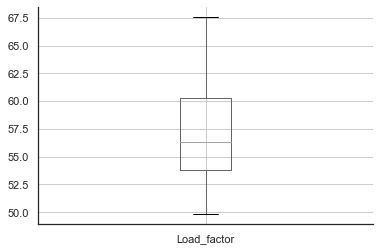


Boxplot for  Demand_growth


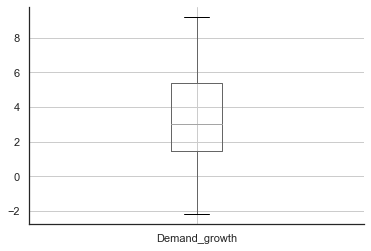


Boxplot for  Sales


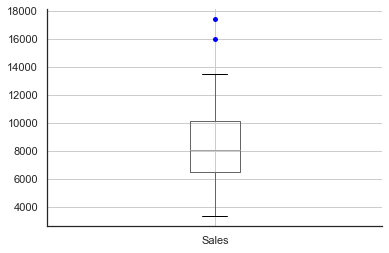


Boxplot for  Nuclear


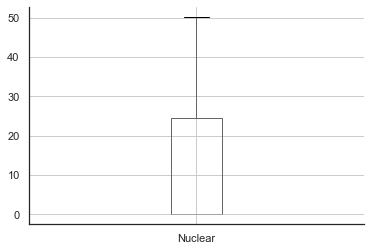


Boxplot for  Fuel_Cost


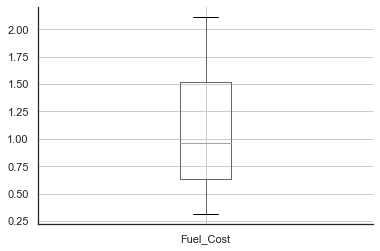

In [144]:
flierprops = dict(marker='o', markerfacecolor='b', markeredgecolor = 'none',
                markersize=5,  linestyle='none')

for column in df.columns[0:]:
  print('Boxplot for ', column)
  df.boxplot(column=column, flierprops=flierprops)
  plt.show()
  print()

**Qno. 3**
### Create a heatmap for the numeric variables. Discuss any interesting trend you see in this chart.
Ans:- Heatmap is visualization technique that uses color to show how correlated are our variable of interest with other variables present in the dataset.
From below heatmap we can get know that there are some variables which are highly correlated (it can be +ve as well as -ve correlation).

ex - 
Fixed_charge and Rate Of Return are positively correlated whereas,
Sales and Fuel_Cost are negatively correlated to each other 

<AxesSubplot:>

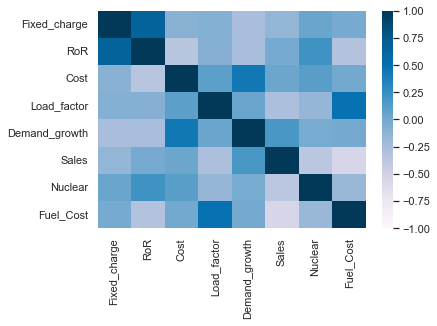

In [145]:
df_corr = df.corr()
sns.heatmap(df_corr, xticklabels=df_corr.columns,
            yticklabels=df_corr.columns, vmin=-1, vmax=1, cmap="PuBu")

**Qno. 4**
### Run principal component analysis using unscaled numeric variables in the dataset. How do you interpret the results from this model?
Ans:- Result indicates that the principal components compared with the unscaled or original data are uncorrelated (correlation coefficient = 0). From this we can avoid multicollinearity problem. 

In this we can see first component in the table which has maximum weights is Sales, then in second is Cost. This shows that Sales and Cost are dominated variance in the data.

From the table below, we get know that the first two componenets account for more than 99% of the total variation associated with 8 original variables, which suggests that we can capture most the variability in the data with less than 15% of the original dimeansions in the data.

From Scree plot, we interpret that right after first component there is a sharp descend which signifies that the second component gives out the total variability over 99%.

In [146]:
pcs = PCA()
pcs.fit(df)
pcsSummary_df = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                           'Proportion of variance': pcs.explained_variance_ratio_,
                           'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)})
pcsSummary_df = pcsSummary_df.transpose()
pcsSummary_df.columns = ['P{}'.format(i) for i in range(1, len(pcsSummary_df.columns) + 1)]
pcsSummary_df.round(4)

,P1,P2,P3,P4,P5,P6,P7,P8
Standard deviation,3549.9901,41.2691,15.4922,4.001,2.7827,1.9766,0.3501,0.1224
Proportion of variance,0.9998,0.0001,0.0000,0.000,0.0000,0.0000,0.0000,0.0000
Cumulative proportion,0.9998,1.0000,1.0000,1.000,1.0000,1.0000,1.0000,1.0000


In [147]:
pcsComponents_df1 = pd.DataFrame(pcs.components_.transpose(), columns=pcsSummary_df.columns, 
                                index=df.columns)
pcsComponents_df1.iloc[:,:5]

,P1,P2,P3,P4,P5
Fixed_charge,-0.000008,-0.000446,0.000115,0.005798,-0.019857
RoR,-0.000006,-0.018626,0.041254,-0.029244,-0.202831
Cost,0.000325,0.997493,-0.056650,0.017910,-0.035584
Load_factor,-0.000362,0.011110,-0.096468,-0.993001,-0.049518
Demand_growth,0.000155,0.032673,-0.003858,-0.054473,0.976858
Sales,0.999998,-0.000221,0.001738,-0.000527,-0.000147
Nuclear,-0.001768,0.058906,0.992732,-0.094907,0.005726
Fuel_Cost,-0.000088,0.000166,-0.015763,-0.027650,0.021505


<function matplotlib.pyplot.show(close=None, block=None)>

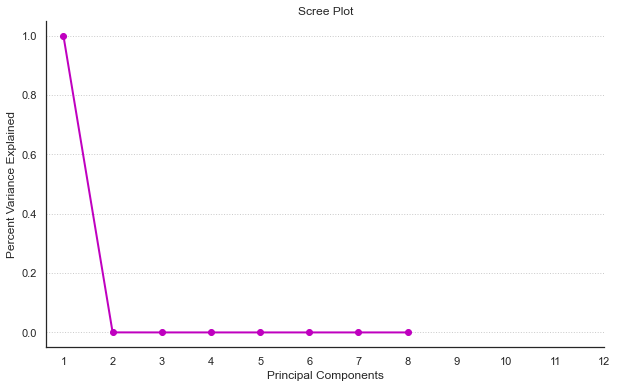

In [148]:
fig, ax = plt.subplots(figsize = (10, 6))

pc_values = np.arange(pcs.n_components_) + 1
ax.plot(pc_values, pcs.explained_variance_ratio_, 'o-', linewidth = 2, color = 'm')

ax.set(title = 'Scree Plot', xlabel ='Principal Components', ylabel = 'Percent Variance Explained', xticks = np.arange(1,13,1))
ax.grid(True, axis='y', linestyle = ':')

plt.show

**PCA Standarised Data**

**Qno. 5**
### Run principal component model after scaling the numeric variables. Did the results/interpretations change? How so? Explain your answers?
Ans:- Scaling of the numeric variables or Normalizing the data is done by examining the weights to see how the original variables contribute to the different principal components. From this we can interpret that Demand_Growth has the highest first principal component in positive direction or weight. Same for second is Sales.

Here we normalize the data because the data we have has different unit of measurement which causes variability in variance. To remove this we standardize it to unit variance. So, here we are normalizing the 8 variables due to the different scales of the variables.

From Below tables we can interpret that first six component account for 95% of the total variability, whereas first two account for only for 51% of the total variability.

From below scree plot we came to know that at principal component 7 we get the maximum total variability, whereas for the unscaled we got total variability very first principal component.

In [149]:
pcs = PCA()
pcs.fit(preprocessing.scale(df))
pcsSummary_df = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                           'Proportion of variance': pcs.explained_variance_ratio_,
                           'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)})
pcsSummary_df = pcsSummary_df.transpose()
pcsSummary_df.columns = ['PC{}'.format(i) for i in range(1, len(pcsSummary_df.columns) + 1)]
pcsSummary_df.round(4)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
Standard deviation,1.5088,1.4109,1.1775,1.0219,0.8246,0.7739,0.4762,0.4213
Proportion of variance,0.2716,0.2375,0.1654,0.1246,0.0811,0.0715,0.0271,0.0212
Cumulative proportion,0.2716,0.5092,0.6746,0.7992,0.8803,0.9518,0.9788,1.0000


In [150]:
pcsComponents_df2 = pd.DataFrame(pcs.components_.transpose(), columns=pcsSummary_df.columns, 
                                index=df.columns)
pcsComponents_df2.iloc[:,:5]

,PC1,PC2,PC3,PC4,PC5
Fixed_charge,-0.445545,-0.232177,0.067128,0.555498,0.400840
RoR,-0.571190,-0.100535,0.071234,0.332096,-0.335942
Cost,0.348691,0.161302,0.467331,0.409084,0.268568
Load_factor,0.288901,-0.409184,-0.142598,0.333739,-0.680071
Demand_growth,0.355361,0.282933,0.281464,0.391397,-0.162637
Sales,-0.053833,0.603095,-0.331991,0.190865,-0.131972
Nuclear,-0.167970,-0.085361,0.737684,-0.333487,-0.249646
Fuel_Cost,0.335840,-0.539885,-0.134424,0.039601,0.292666


<function matplotlib.pyplot.show(close=None, block=None)>

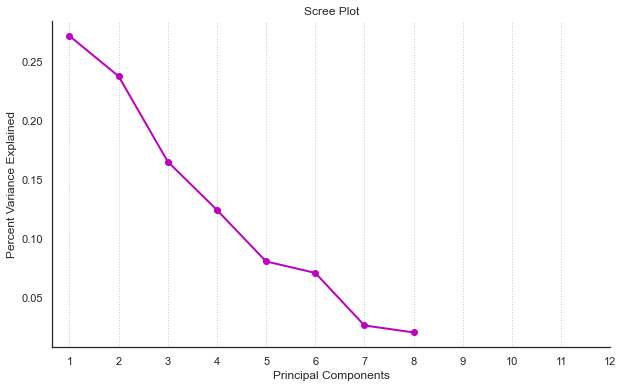

In [151]:
fig, ax = plt.subplots(figsize = (10, 6))

pc_values = np.arange(pcs.n_components_) + 1
ax.plot(pc_values, pcs.explained_variance_ratio_, 'o-', linewidth = 2, color = 'm')

ax.set(title = 'Scree Plot', xlabel ='Principal Components', ylabel = 'Percent Variance Explained', xticks = np.arange(1,13,1))
ax.grid(True, axis='x', linestyle = ':')

plt.show

Text(0, 0.5, 'PC2')

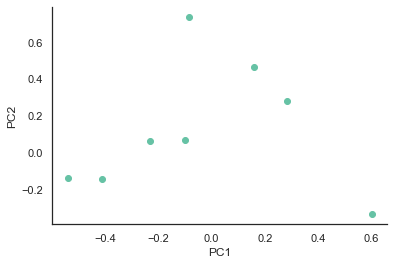

In [152]:
plt.scatter(pcsComponents_df2.iloc[:,1],pcsComponents_df2.iloc[:,2])
plt.xlabel("PC1")
plt.ylabel("PC2")